## CSCI-UA 9473 Introduction to Machine Learning 
### Assignment 1: Gradient descent


__Name:__ Pedro Velasquez

__NetID:__ pv850

__Given date:__ Feb 5

__Due date:__ Feb 19

__Total:__ 10pts

### Question 1. (5pts) Local vs global minimas and gradient descent

We consider the following function.

\begin{align}
F(x_1, x_2) =  3(1-x_1)^2\exp(-(x_1^2) - (x_2+1)^2)\\ 
   - 10(x_1/5 - x_1^3 - x_2^5)\exp(-x_1^2-x_2^2)\\
   - (1/3)\exp(-(x_1+1)^2 - x_2^2)
\end{align}

The surface plot of this function is given below together with its contour plot. The function has a single global minimum located near $(0.23, -1.62)$ and shown in red in the contour plot.

We want to implement gradient descent iterations on that function. Starting from a random initial point $(x_1, x_2)$, code the following updates 

\begin{align}
x_1^{(k+1)} = x_1^{(k)} - \eta * \text{grad}_{x_1} F(x_1, x_2)\\
x_2^{(k+1)} = x_2^{(k)} - \eta * \text{grad}_{x_2} F(x_1, x_2)
\end{align}

where $\text{grad}_{x_i}$ represents the gradient of $F(x_1, x_2)$ with respect to $x_i$. Choose a sufficiently small learning rate and plot the iterates (in white) on the contour plot. Repeat your experiments for various initial iterates.  

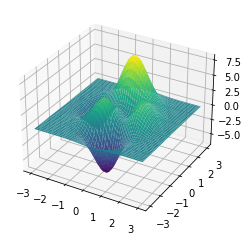

In [1]:
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import

import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np


fig = plt.figure()
ax = fig.gca(projection='3d')

# Make data.
x = np.linspace(-3, 3, 100)
y = np.linspace(-3, 3, 100)
x1, x2 = np.meshgrid(x, y)
F = 3*(1-x1)**2 * np.exp(-(x1**2) - (x2+1)**2)\
   - 10*(np.true_divide(x1,5) - x1**3 - x2**5)*np.exp(-x1**2 - x2**2)\
   - np.true_divide(1,3)*np.exp(-(x1+1)**2 - x2**2)

# Plot the surface.
surf = ax.plot_surface(x1, x2, F, linewidth=0, alpha=1, cmap = 'viridis')
plt.show()



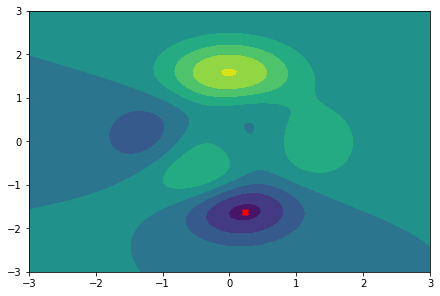

In [2]:
fig1, ax = plt.subplots(constrained_layout=True)
contour = ax.contourf(x1, x2, F,cmap = 'viridis')
plt.scatter(0.23, -1.62,c='r',marker='X')
plt.show()

Local minima: (0.29643408621944584, 0.3202733582899502)


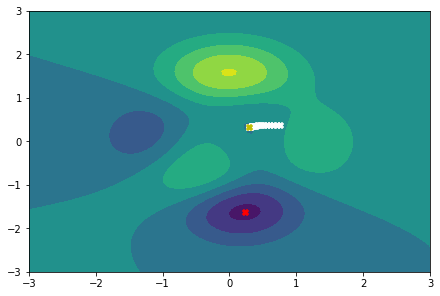

Local minima: (-1.3472947894056004, 0.20478878330034553)


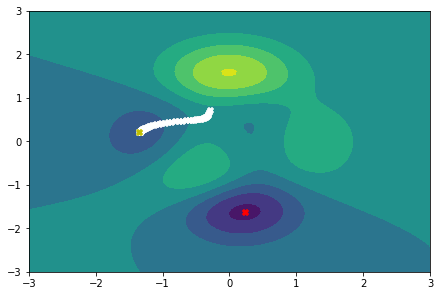

Local minima: (0.29922277048396684, 0.301182307809464)


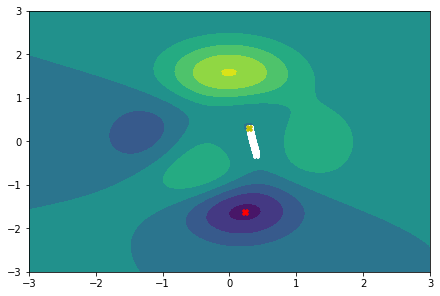

Local minima: (-1.3473980935983434, 0.20451381282292994)


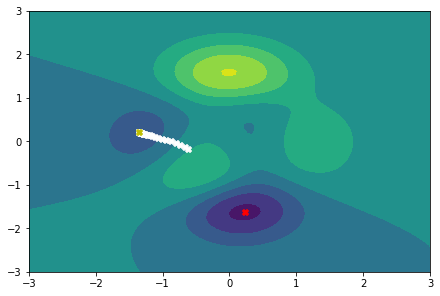

Local minima: (-1.3474324074936288, 0.20442226711113426)


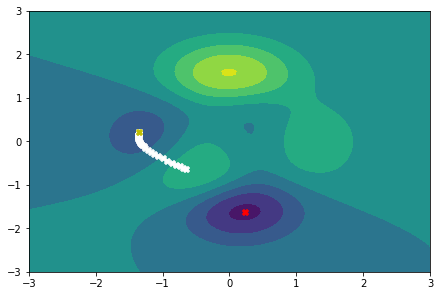

In [3]:
# put your solution here
# Define partial derivatives

# Partial derivative of F in terms of x1
# dF/dx1 = -6(1 - x1)(1 + x1(1 - x1))e^(-(x1^2) - (x2+1)^2) 
#          - 10(1/5 - 3 * x1^2 - 2 * x1(x1 / 5 - x1^3 - x2^5))e^(-(x1^2) - x2^2)
#          + 2/3 (x1 + 1)e^(-(x1 + 1)^2 - x2**2)

def dF_x1(x, y):
    return -6 * (1 - x) * (1 + x * (1 - x)) * np.exp(-(x**2) - ((y + 1)**2)) \
            - 10 * (np.true_divide(1, 5) - 3 * x**2 - 2 * x * (np.true_divide(1, 5) * x - x**3 - y**5)) *\
            np.exp(-(x**2) - (y**2)) \
            + np.true_divide(2, 3) * (x + 1) * np.exp(-(x + 1)**2 - (y**2))


# dPartial derivative of F in terms of x2
# dF/dx2 = -6((1 - x1)^2)(x2 + 1)e^(-(x1^2) - (x2+1)^2) 
#          + 10(5 * x2^4 + 2 * x2(x1 / 5 - x1^3 - x2^5))e^(-(x1^2) - x2^2)
#          + 2/3 * x2 * e^(-(x1 + 1)^2 - x2**2)
def dF_x2(x, y):
    return -6 * (1 - x)**2 * (y + 1) * np.exp(-(x**2) - (y + 1)**2)\
            + 10 * (5 * y**4 + 2 * y * (x * np.true_divide(1, 5) - x**3 - y**5)) *\
            np.exp(-(x**2) - y**2)\
            + np.true_divide(2, 3) * y * np.exp(-((x + 1)**2) - y**2)
        
        
# # # # # # # # # #
# # # # # # # # # #


# Run gradient descent

# define learning rate and iterations
learning_rate = 0.01
maxIter = 100
iterations = 5

# Gather all sets of coordinates to be plotted later
for i in range(iterations):
    # start at a random x1, x2 position
    coordinates = np.random.normal(0, 0.7, 2)
    x_1 = coordinates[0]
    x_2 = coordinates[1]
    
    # Plot function
    fig1, ax = plt.subplots(constrained_layout=True)
    contour = ax.contourf(x1, x2, F,cmap = 'viridis')
    plt.scatter(0.23, -1.62,c='r',marker='X') # Plot absolute min
    
    # iterate with gradient to converge to a min
    for j in range(maxIter):
        
        # Plot point
        plt.scatter(x_1, x_2, c="w",marker="X")
        
        # Apply descent    
        x_1 = x_1 - learning_rate * dF_x1(x_1, x_2)
        x_2 = x_2 - learning_rate * dF_x2(x_1, x_2)

    # Plot last point, color it yellow
    plt.scatter(x_1, x_2,c='y',marker='X')
    print("Local minima: (", x_1, ", ", x_2, ")", sep="")
    plt.show()
    
# # # # # # # # # #
# # # # # # # # # #

### Question 2. (5pts) Regression through the normal equations 

We consider the simple regression problem below, similar to the one discussed in class. 
Find the model that minimizes the sum of squares loss

\begin{align}
\ell(\boldsymbol \beta) = \frac{1}{2N}\sum_{i=1}^N (t_{\text{noisy}}^{(i)} -  (\beta_0 +\beta_1 x^{(i)}))^2
\end{align}

__using the Normal Equations__. To do this:

- Start by building the matrix $\tilde{\boldsymbol X}$ with
\begin{align}
\tilde{\boldsymbol X} = \left[\begin{array}{cc}
1 & x^{(1)} \\
\vdots & \vdots \\
1 & x^{(N)} \end{array}\right]
\end{align}
- Then compute the matrix $\tilde{\boldsymbol X}^T\tilde{\boldsymbol X}$ and the vector $\tilde{\boldsymbol X}^T\boldsymbol t$ where $\boldsymbol t = [t_{\text{noisy}}^{(1)}, \ldots , t^{(N)}_{\text{noisy}}]^T$

- Finally solve the equations through

\begin{align}
\boldsymbol \beta_{\text{OLS}} = \left(\tilde{\boldsymbol X}^T\tilde{\boldsymbol X}\right)^{-1}(\tilde{\boldsymbol X}^T\boldsymbol t) 
\end{align}

using the function __np.linalg.inv__ from the linear algebra package. Plot the result in green on top of the plot below and compare with the true (blue) (unknown) model.  


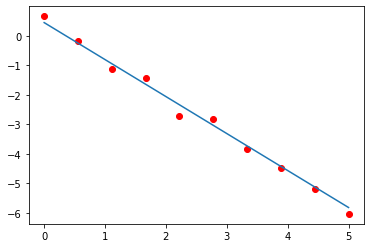

In [4]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0,5,10)

noise = np.random.normal(0,.3,len(x))
beta_true = np.random.normal(0,1,2)

t = beta_true[0] + beta_true[1]*x

tnoisy = t+noise

plt.scatter(x, tnoisy, c='r')
plt.plot(x, t)
plt.show()

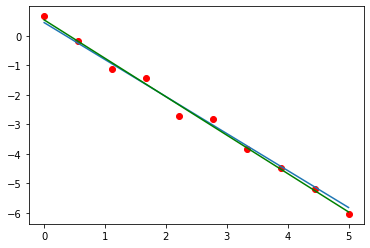

Loss from beta (green): 0.016590767511624395
Loss from beta_true (blue): 0.020014495404843208


In [5]:
# put your code here

# create x_tilde
x_tilde = np.hstack((np.ones((len(x), 1)), x.reshape(-1, 1)))

# get beta 
x_tilde_squared = np.dot(x_tilde.T, x_tilde) # X.T * X
x_t = np.dot(x_tilde.T, tnoisy) # X.T * t
inverse = np.linalg.inv(x_tilde_squared) # (X.T * X)^-1
beta = np.dot(inverse, x_t) # (X.t * X)^-1 * (X.T * t)

# calculate loss of beta and beta_true
loss_beta = np.true_divide(1, 2 * len(x)) * np.sum((tnoisy - np.dot(x_tilde, beta))**2)
loss_beta_true = np.true_divide(1, 2 * len(x)) * np.sum((tnoisy - np.dot(x_tilde, beta_true))**2)

plt.scatter(x, tnoisy, c='r') # scatter data
plt.plot(x, t) # original line with beta_true
plt.plot(x, np.dot(x_tilde, beta), c="g") # line estimated with normal equations
plt.show()

# Print the loss
print("Loss from beta (green):", loss_beta) # Estimated by program
print("Loss from beta_true (blue):", loss_beta_true) # original beta